### Semelhança de imagens.

Neste Notebook Vamos trabalhar com visão computacional, de maneira simples e eficiente, sem por exemplo, usar nenhuma rede neural ou aprendizado de máquina, iremos apenas usar duas bibliotecas poderosas para trabalho com imagens, são elas:

  1 - OpenCV

  2 - Skimage 

Nosso principal objetivo é analisar quando duas imagens são iguais ou diferentes e também comparar similaridades entre as duas.


In [1]:
# importanto as funções e bibliotecas

import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage.metrics import structural_similarity, normalized_root_mse

Para exemplo, usaremos duas imagens de um jogo dos sete erros:

In [2]:
imagem1= cv2.imread("gar1.jpg")
imagem2 = cv2.imread("gar2.jpg")

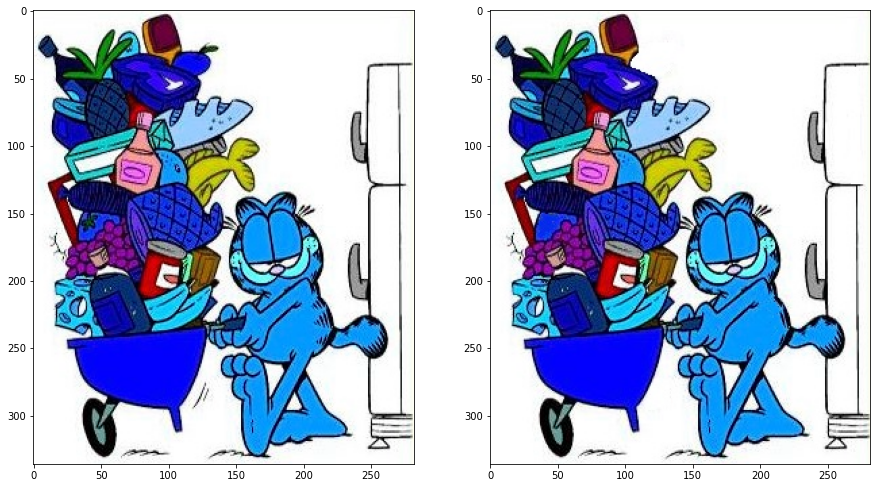

In [3]:
plt.figure(figsize= [15,12])
plt.subplot(1,2,1)
plt.imshow(imagem1)

plt.subplot(1,2,2)
plt.imshow(imagem2)

plt.show()

Qualquer imagem carregada nada mais é do que uma matriz, portanto o jeito mais simples de saber se duas imagens são iguais ou não é calculado a diferença entre essas duas matrizes, podemos usar a função subtract do OpenCV para fazer essa análise

In [4]:
# subtraindo a primeira imagem dela mesma.

diff1 = cv2.subtract(imagem1,imagem1)

diff1

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

Claro que como subtraimos a mesma imagem dela mesmo, nossa matriz resultante é toda nula, porém como podemos ver isso formalmente? 

Faremos isso com o auxílio da função .any do numpy, que nos diz se existe algum valor não nulo na matriz que queremos, e nos retorna um resultado booleano, True ou False.

In [5]:
diferentes = np.any(diff1)

diferentes

False

Como não temos nenhum valor diferente de zero, temos que as duas matrizes que usamos para fazer a subtração são iguais. Como já sabiamos.

Vamos agora repetir o processo para a segunda imagem, que não é a mesma, pois estamos no jogo dos sete erros.

In [6]:
diff2 = cv2.subtract(imagem1,imagem2)

diferentes1 = np.any(diff2)

diferentes1

True

Portanto as imagens realmente não são iguais, será que conseguimos achar os sete erros com algum com algum comando? Sim, conseguimos, para isso usaremos a função do OpenCV absdiff que nos destaca os pixels das duas imagens que são realmente diferentes.

In [7]:
diferenca = cv2.absdiff(imagem1,imagem2)

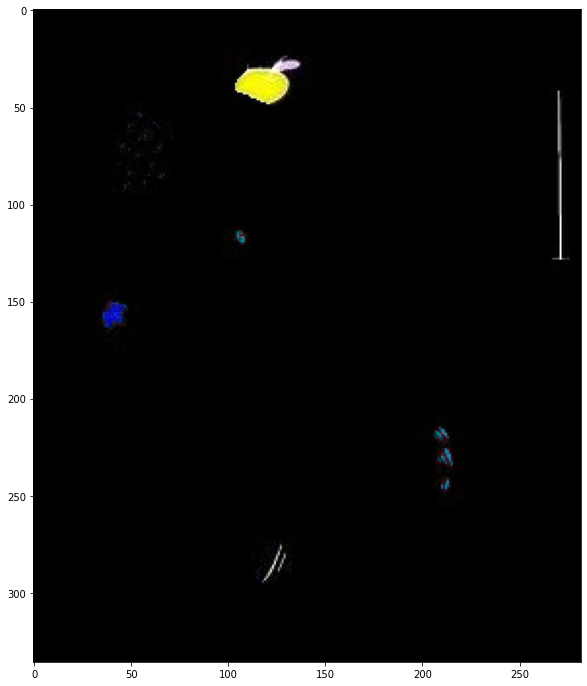

In [8]:
# vendo os pontos de diferença:

plt.figure(figsize=[15,12])
plt.imshow(diferenca)
plt.show()

Temos exatamente 7 pontos de diferença entre as imagens, que são os sete erros que procuramos.


### Semelhanças e MSE entre imagens.

Além de conseguir analisar se duas imagens são iguais, ou diferentes e encontrar esses pontos de diferença, podemos também calcular o quão duas imagens tem a estrutura semelhante e calcular o mse delas.

As funções que usaremos para isso são duas funções da biblioteca skimage:

In [9]:
from skimage.metrics import structural_similarity, mean_squared_error

In [10]:
# calculando a similaridade e mse da imagem1 e imagem 2

st = structural_similarity(imagem1, imagem2, multichannel=True)
mse = mean_squared_error(imagem1, imagem2)

print(st,mse)

0.9742807778842271 257.73959036924464


Como temos imagens bem parecidas, já era de imaginar que teriamos um alto valor de similaridade e um baixo MSE, agora, se compararmos uma imagem com ela mesmo, obtemos os esperados valores 1 para similaridade e 0 para mse

In [11]:
st1 = structural_similarity(imagem1, imagem1, multichannel=True)
mse1 = mean_squared_error(imagem1, imagem1)

st1,mse1

(1.0, 0.0)

Portanto conseguimos algo a mais, além de saber se duas imagens são iguais, conseguimos metrificar o quão iguais ou diferentes são, para finalizar esse notebook, vamos criar uma classe com tudo que fizemos até agora

In [12]:
class imagens_iguais():
    
    def __init__(self, img1, img2):
      image1= cv2.imread(img1)
      image2 = cv2.imread(img2)
      self.image1 = image1
      self.image2 = image2
      self.diff = None
    
    def iguais_ou_nao(self):
      if np.any(cv2.subtract(self.image1,self.image2)):
        self.diff = cv2.absdiff(self.image1,self.image2)
        return "As imagens são diferentes"
      else:
        self.diff = cv2.absdiff(self.image1,self.image2)
        return "As imagens são iguais"
    def mostrar_tudo(self):
      plt.figure(figsize=[15,12])
      plt.subplot(1,3,1)
      plt.title('Imagem 1', fontsize=15, fontweight='bold')
      plt.imshow(self.image1)
      plt.subplot(1,3,2)
      plt.title('Imagem 2', fontsize=15, fontweight='bold')
      plt.imshow(self.image2)
      plt.subplot(1,3,3)
      plt.title('diferenças', fontsize=15, fontweight='bold')
      plt.imshow(self.diff)
      plt.show()
    
    def mostrar_diff(self):
       plt.figure(figsize=[15,12])
       plt.title('diferenças', fontsize=15, fontweight='bold')
       plt.imshow(self.diff)
       plt.show()
    
    def similaridades(self):
      st = structural_similarity(self.image1,self.image2, multichannel=True)
      return 'Similaridade das imagens: ', st

    def MSE(self):
      MSE = mean_squared_error(self.image1,self.image2)
      return 'MSE das imagens: ', MSE

Vamos então criar uma classe e testar com as imagens que já usamos inicialmente.

In [13]:
diferencas = imagens_iguais('gar1.jpg', 'gar2.jpg')

In [14]:
diferencas.iguais_ou_nao()

'As imagens são diferentes'

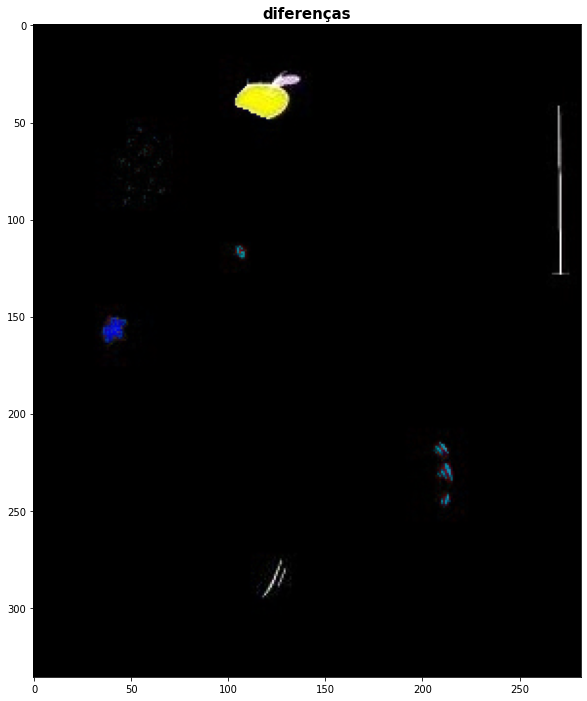

In [15]:
diferencas.mostrar_diff()

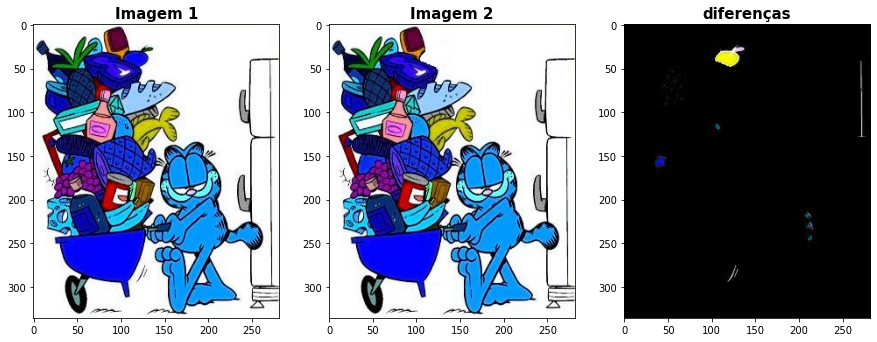

In [16]:
diferencas.mostrar_tudo()

In [17]:
diferencas.similaridades()

('Similaridade das imagens: ', 0.9742807778842271)

In [18]:
diferencas.MSE()

('MSE das imagens: ', 257.73959036924464)

Finalizamos aqui nosso notebook, conseguindo cumprir nosso objetivo de trabalhar um pouco com visão commputacional sem precisar de nenhuma rede neural e de nenhum assunto muito complexo, e sim de uma forma simples e prática.